In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
print('Imports complete, GET Some!')

Imports complete, GET Some!


In [2]:
plt.rc('figure', figsize=(16, 9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

np.random.seed(13)

#################
codeup students start producing a scratch off lottery ticket
called "Golden Codys". The odds of winning a prize must be 
advertised to the state, and since we are manufacturing the 
tickets, we know exactly how many winners and losers there are.

+Theory: Our population is the 1000 tickets we have manufactured

+Implementation: Create a boolean pandas Series

++ we model win with true and lose with false
++ because of this, we can take the mean of a series to measure the likelihood of winning

The actual probability of winning is 0.25


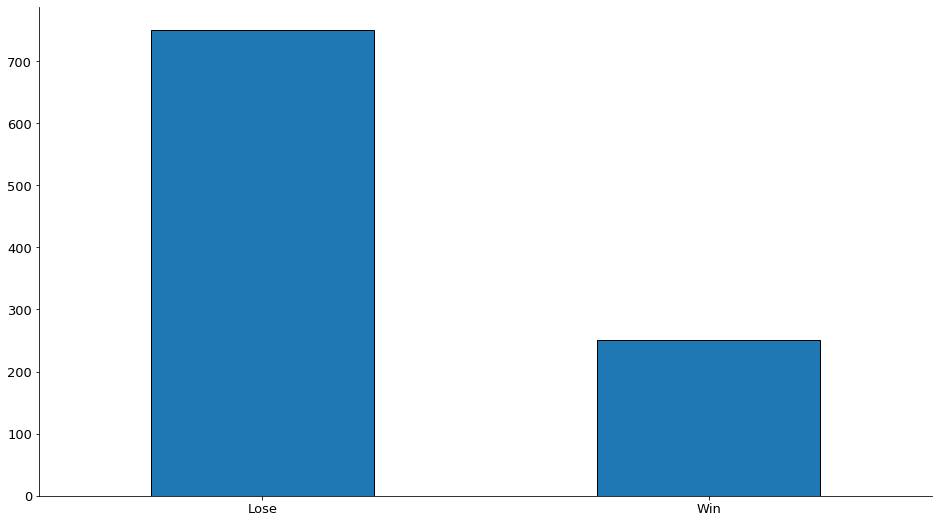

In [3]:
tickets = pd.Series([True] * 250 + [False] * 750)
tickets.value_counts().set_axis(['Lose', 'Win']).plot.bar()
plt.xticks(rotation=0)
print('The actual probability of winning is %.2f' % tickets.mean())

+Scenario: Each student in a classroom is given a Golden Cody scratch off at random
+Theory

+We take a random sample and calculate the win rate, we won't expect to see exactly
25% even though we know that is what the overall rate is.

+Examples of biased samples:

++ non-response: people that don't respond are a diff population
++ undercoverage: some groups aren't well represented
++ voluntary: people volunteer for surveys
++ leading questions
++ social desirability

+Implementation: Use the .sample method on our series to randomly choose 25 tickets, 
representing 25 students in a classroom. Use .mean to calculate what percentage of 
the values are True, or are winning tickets.

In [4]:
n = 25
tickets.sample(n).mean()

0.12

+Scenario: each student in 4 different cohorts is given a Golden Codys scratch off 
ticket, we want to calculate the win rate for each classroom.

+Theory: it is unlikely any classroom will have exactly a 25% winrate, instead we
will see slightly different numbers for each classroom.

+Implementation: loop through a range of 5 to get a sample and calculate the 
winrate 5 times. Each of the 5 numbers produced represents the calculated winrate 
for one classroom of 25 students.

In [5]:
[tickets.sample(n).mean() for i in range(5)]

[0.28, 0.28, 0.08, 0.24, 0.36]

Theory

+The winrates we see aren't ever exactly 25%, but we would expect the rate to be 
closer to 25% than further away. That is, it is more likely that a classroom 
will come up with a win rate of 24% than a winrate of 10%.

+If we were to repeat this experiment a whole bunch of times, say 10,000, we 
would find that the calculated winrates are, in fact, normally distributed.

+That is, we would expect the calculated average winrate for a classroom to follow 
a normal distribution, even though the underlying random process is not based 
on a normal distribution

+Implementation: To visualize this, we'll create a series full of calculated 
winrates for 10,000 classrooms, each classroom made up of 25 students. That is, 
we will simulate 10,000 classrooms of 25 students getting Golden Codys and 
calculate the average winrate for each of the 10,000 classrooms.

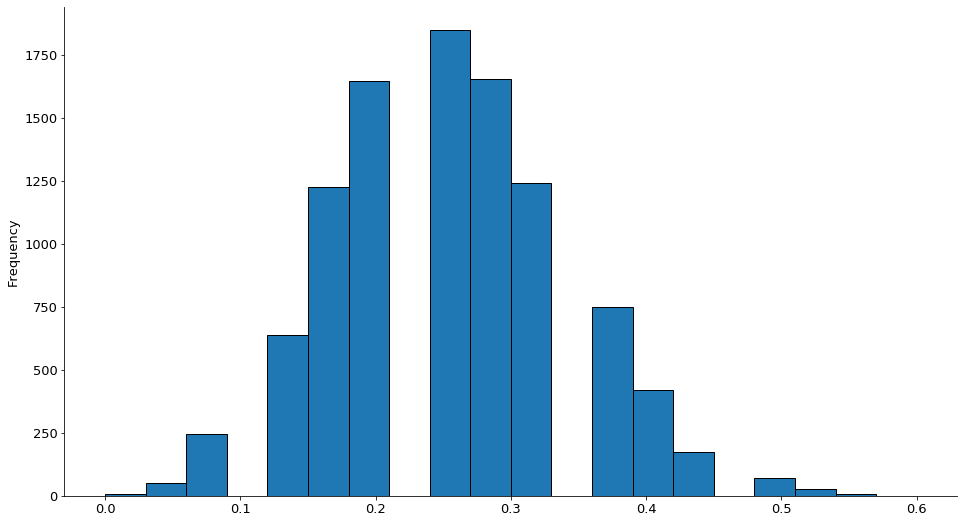

In [6]:
calculated_winrates = pd.Series([tickets.sample(n).mean() for _ in range(10_000)])
calculated_winrates.plot.hist(bins=20)

^^^Theory^^^

+The above visual represents the sampling distribution for the 
winrate of Golden Codys, based on a class of 25.

+The Central Limit Theorm says that sampling distribution will 
be normally distributed even if the underlying random variable isn't.

####### Mini Exercise CLT

+Calculate, theoretically (in your head is fine), the expected 
value for the average of 6 dice rolls.

+Write the code necessary to simulate taking the average of 6 
dice rolls 10,000 times. Store each of the 10,000 averages in a list.

+Plot the distribution of the calculated averages. What do 
you notice about the shape of the distribution of calculated 
averages? What kind of distribution is the underlying random 
variable (i.e. one dice roll?)

In [7]:
se = math.sqrt((.25 * .75) / n)

Let's compare our calculated standard error (i.e. the standard deviation of the sample means) to the experimental value:¶

In [8]:
print('se:                 %.4f' % se)
print('sample_means.std(): %.4f' % calculated_winrates.std())

se:                 0.0866
sample_means.std(): 0.0857


That the sampling distribution being normally distributed is very powerful and has important implications:
confidence intervals for population parameter estimates (e.g. estimating the population mean):
as n goes up, interval becomes smaller
as certainty goes up, interval becomes larger
99% of calculated CIs will contain the true mean (e.g. if we ran simulations and re-sampled, 99% of the simulations' calculated CIs would contain the true mean)
hypothesis testing
One classroom calculates their winrate at 20% and claims the tickets were distributed unfairly. What is the likelihood we observe a 20% (or smaller) winrate just due to chance?

In [9]:
mean = calculated_winrates.mean()
sd = calculated_winrates.std()

stats.norm(mean, sd).cdf(.2)

0.28283511827393837

The probability we've calculated is a p-value. The likelihood that we observe the data that we have if the null hypothesis is true.¶

Null and Alternative Hypothesis¶
$H_0$: status quo: no difference or no effect $H_a$: alternative: there is a difference or effect
whether $H_a$ is ≠ , <, >, determines one-tailed vs two-tailed test
< or > == one-tailed
≠ == two-tailed
Hypothesis Testing Results¶

Fail to reject $H0$  TN  FN (Type II) Reject $H0$  FP (Type I)  TP
Mini Exercise -- Null + Alternate Hypothesis and Errors¶

For each of the following scenarios: refine the question, generate a null and alternative hypothesis, and give examples of true positives, true negatives, type I and type II errors.
Are the average grades in web development vs data science classes different?
Is there a relationship between how early a student shows up to class and their grade?
Are web dev or data science students more likely to be coffee drinkers?

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.¶

Has the network latency gone up since we switched internet service providers?¶

Source:¶
number of tickets being proceesed or speed of processing tickets
Hypotheses:¶

$H_0$: The speed of execution of tickets hasn't changed

$H_a$: The speed of processing tickets has gone down since switching to Google Fiber

Possible Outcomes:¶

True Positive: Finding that the speed of execution has really gone up.

False Positive (Type I Error): the speed of procesing tickets has gone up but I already switch to Google Fiber

True Negative: Finding that the speed of query execution hasn't changed at all.

False Negative (Type II Error):Finding that the speed of processing tickets hasn't changed but we have more server querries due to a new customers.

* Is the website redesign any good?¶

Source¶

number of clicks per newly design website
Hypotheses

$H_0$: The number of clicks have stayed the same.

$H_a$: The number of clicks are much much higher.

Possible Results

True Positive: the number of clicks are higher than the old website

True Negative: the number of clicks haven't changed.

False Positive (Type I Error): the number of clicks are higher but we invested to do a big promo ad.

False Negative (Type II Error): the number of clicks haven't changed but our our promo cost us a lot of money

 Is our television ad driving more sales?¶

Source
number of TV sold this past month

Hypotheses

$H_0$: the number of TV sold haven't changed.

$H_a$: the number of TV sold have tuly increased or gone up.

Possible Results

True Positive: the number of TV sold have gone up and they have gone up.

True Negative: the number of TV sold haven't changed and they aren't causing more or less sales.

False Positive (Type I Error): the number of TV sold have gone up but we also just opened a new store.

False Negative (Type II Error): the number of TV sold haven't changed but we also just closed a store.

Correlation exercies

In [10]:
### Correlation Exercies
#Use the telco_churn data. Does tenure correlate with monthly charges? 
#Total charges? What happens if you control for phone and internet service?
from env import host, user, password
def get_db_url(database, user=user, host=host, password=password): 
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'
    
df = pd.read_csv('/Users/cryptobandido/codeup-data-science/statistics-exercises/Cust_Churn_Telco.csv')
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


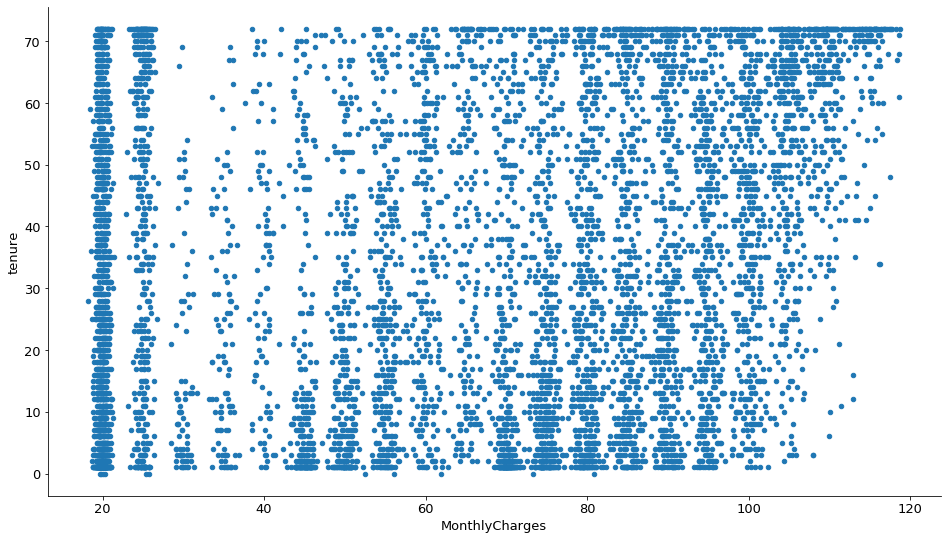

In [11]:
#Does tenure correlate with monthly charges?
df.plot.scatter(y = 'tenure', x = 'MonthlyCharges')

In [18]:
x = df.tenure
y = df.MonthlyCharges

r,p = stats.pearsonr(x,y)
print('r=', r)
print('p=', p)
alpha = .05
print('The p is less than the alpha so we reject the Ho. The r is also not that high above 0 which represents a positive linear relationship. ')


r= 0.24789985628615002
p= 4.0940449915016345e-99
The p is less than the alpha so we reject the Ho. The r is also not that high above 0 which represents a positive linear relationship. 


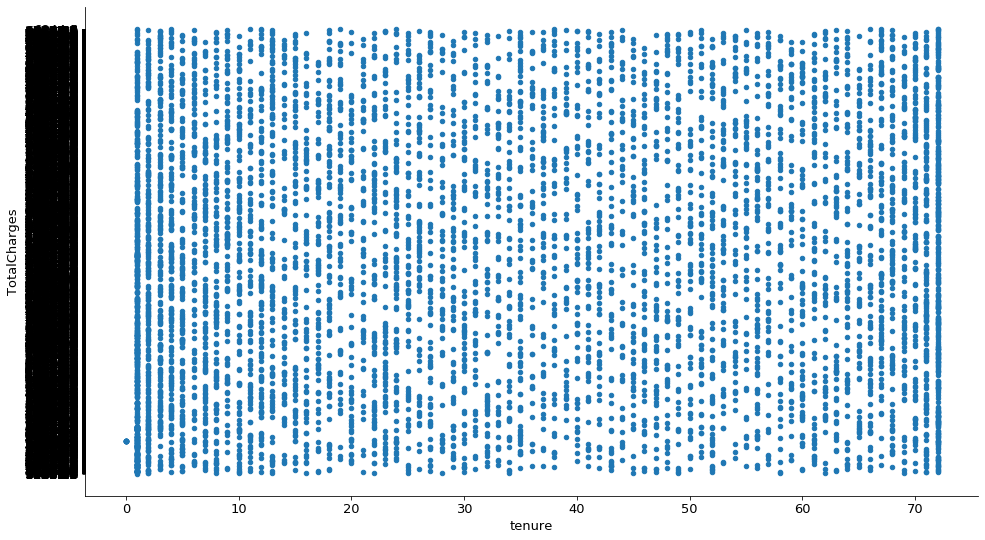

In [17]:
#Does tenure correlate with Total charges?

df.plot.scatter(y = 'TotalCharges', x = 'tenure')

In [21]:
# check for null values in Total Charges
#telco.info()
# yes, there are null values
#null_val = telco['TotalCharges'].isnull()
# have to get rid of null values in Total Charges
#null_val
df['totalnonull'] = df['TotalCharges'].isnull()
df['TotalCharges'] = df.TotalCharges.fillna(0)
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [ ]:
r, p = stats.pearsonr(df['TotalCharges'], df['tenure'])
print('r=', r)
print('p=', p)

In [ ]:
#What happens if you control for phone and internet service?
###Control for phone
# set up variables to sort phone or no phone
phone = df[df.PhoneService == 'Yes']
nophone = df[df.PhoneService == 'No']
r, p = stats.pearsonr(phone['TotalCharges'], phone['tenure'])
print('r=', r)
print('p=', p)

In [ ]:
# Control for internet
df['internetTF'] = np.where(df.InternetService.str.startswith('N'), 'no', 'yes')

# set varialble for internet or not
internet = df[df.internetTF == 'yes']
nointernet = df[df.internetTF == 'no']

r, p = stats.pearsonr(internet['TotalCharges'], internet['tenure'])
print('r=', r)
print('p=', p)

In [ ]:
#Use the employees database.
#Is there a relationship between how long an employee has been with the company and their salary?

# query for employee data, time with company and salary and number of titles
query = """select emp_no, hire_date, title, titles.from_date as 'title_from', titles.to_date as 'title_to', salary, salaries.from_date as 'salary_from', salaries.to_date as 'salary_to' 
from employees
join titles using (emp_no)
join salaries using (emp_no);"""
emp = pd.read_sql(query, get_db_url('employees'))
emp.head()

In [ ]:
# read df to csv so don't have time delay accessing
emp.to_csv('employees_df.csv')

# read back in from local csv file
emp = pd.read_csv('employees_df.csv', index_col=0)
emp.sample(10)